In [1]:
import pandas as pd
import re
import matplotlib
from matplotlib import pyplot as plt
import statistics as st
import numpy as np

In [2]:
data = pd.read_csv("url_info1.csv")

In [3]:
data.head()

,covid,cardiopatia+isquemica,accidente+cerebrovascular,enfermedad+pulmonar+obstructica+cronica,infecciones+vias+respiratorias+inferiores,afecciones+neonatales,cancer+traquea,cancer+bronquios,cancer+pulmon,alzheimer,enfermedad+diarreica,diabetes+melitus,nefropatia
0,"Aproximadamente 320.000.000 resultados (0,35 s...","Aproximadamente 799 resultados (0,29 segundos)","Aproximadamente 12.200 resultados (0,41 segund...","Aproximadamente 1.010 resultados (0,38 segundos)","Aproximadamente 2.240 resultados (0,41 segundos)","Aproximadamente 13.100 resultados (0,36 segund...","Aproximadamente 435 resultados (0,35 segundos)","Aproximadamente 1.090 resultados (0,39 segundos)","Aproximadamente 6.140 resultados (0,43 segundos)","Aproximadamente 3.540.000 resultados (0,39 seg...","Aproximadamente 1.220 resultados (0,30 segundos)","Aproximadamente 204.000 resultados (0,34 segun...","Aproximadamente 4.370 resultados (0,34 segundos)"
1,"Aproximadamente 149.000.000 resultados (0,43 s...","Aproximadamente 570 resultados (0,51 segundos)","Aproximadamente 6.050 resultados (0,36 segundos)","Aproximadamente 615 resultados (0,62 segundos)","Aproximadamente 1.200 resultados (0,40 segundos)","Aproximadamente 6.980 resultados (0,39 segundos)","Aproximadamente 237 resultados (0,33 segundos)","Aproximadamente 527 resultados (0,40 segundos)","Aproximadamente 3.190 resultados (0,38 segundos)","Aproximadamente 256.000 resultados (0,41 segun...","Aproximadamente 625 resultados (0,36 segundos)","Aproximadamente 105.000 resultados (0,48 segun...","Aproximadamente 2.310 resultados (0,29 segundos)"
2,"Aproximadamente 315.000.000 resultados (0,44 s...","Aproximadamente 845 resultados (0,29 segundos)","Aproximadamente 16.400 resultados (0,39 segund...","Aproximadamente 1.200 resultados (0,43 segundos)","Aproximadamente 2.210 resultados (0,44 segundos)","Aproximadamente 13.600 resultados (0,39 segund...","Aproximadamente 484 resultados (0,35 segundos)","Aproximadamente 1.410 resultados (0,36 segundos)","Aproximadamente 6.430 resultados (0,44 segundos)","Aproximadamente 4.520.000 resultados (0,51 seg...","Aproximadamente 1.410 resultados (0,30 segundos)","Aproximadamente 219.000 resultados (0,35 segun...","Aproximadamente 4.350 resultados (0,39 segundos)"
3,"Aproximadamente 408.000.000 resultados (0,44 s...","Aproximadamente 543 resultados (0,29 segundos)","Aproximadamente 14.800 resultados (0,38 segund...","Aproximadamente 1.130 resultados (0,42 segundos)","Aproximadamente 2.050 resultados (0,40 segundos)","Aproximadamente 14.600 resultados (0,42 segund...","Aproximadamente 479 resultados (0,30 segundos)","Aproximadamente 1.400 resultados (0,39 segundos)","Aproximadamente 6.310 resultados (0,37 segundos)","Aproximadamente 4.630.000 resultados (0,41 seg...","Aproximadamente 1.410 resultados (0,29 segundos)","Aproximadamente 215.000 resultados (0,41 segun...","Aproximadamente 4.200 resultados (0,35 segundos)"
4,"Aproximadamente 436.000.000 resultados (0,66 s...","Aproximadamente 502 resultados (0,28 segundos)","Aproximadamente 12.200 resultados (0,39 segund...","Aproximadamente 1.180 resultados (0,44 segundos)","Aproximadamente 2.370 resultados (0,36 segundos)","Aproximadamente 14.700 resultados (0,36 segund...","Aproximadamente 471 resultados (0,31 segundos)","Aproximadamente 1.420 resultados (0,61 segundos)","Aproximadamente 6.640 resultados (0,43 segundos)","Aproximadamente 4.600.000 resultados (0,41 seg...","Aproximadamente 1.460 resultados (0,33 segundos)","Aproximadamente 214.000 resultados (0,42 segun...","Aproximadamente 4.210 resultados (0,36 segundos)"


In [4]:
covid = []
for i in range(len(data["covid"])):
    covid.append(data["covid"][i].replace('.',''))

In [5]:
covid

['Aproximadamente 320000000 resultados (0,35 segundos)\xa0',
 'Aproximadamente 149000000 resultados (0,43 segundos)\xa0',
 'Aproximadamente 315000000 resultados (0,44 segundos)\xa0',
 'Aproximadamente 408000000 resultados (0,44 segundos)\xa0',
 'Aproximadamente 436000000 resultados (0,66 segundos)\xa0',
 'Aproximadamente 224000000 resultados (0,45 segundos)\xa0',
 'Aproximadamente 386000000 resultados (0,52 segundos)\xa0',
 'Aproximadamente 439000000 resultados (0,60 segundos)\xa0',
 'Aproximadamente 232000000 resultados (0,48 segundos)\xa0',
 'Aproximadamente 478000000 resultados (0,44 segundos)\xa0',
 'Aproximadamente 448000000 resultados (0,55 segundos)\xa0',
 'Aproximadamente 609000000 resultados (0,45 segundos)\xa0',
 'Aproximadamente 213000000 resultados (0,42 segundos)\xa0',
 'Aproximadamente 600000000 resultados (0,48 segundos)\xa0',
 'Aproximadamente 586000000 resultados (0,46 segundos)\xa0',
 'Aproximadamente 608000000 resultados (0,72 segundos)\xa0',
 'Aproximadamente 500000

In [6]:
col_name = list(data.columns)
name = []
for e in col_name:
    name.append(e.replace('+',' '))

In [7]:
name

['covid',
 'cardiopatia isquemica',
 'accidente cerebrovascular',
 'enfermedad pulmonar obstructica cronica',
 'infecciones vias respiratorias inferiores',
 'afecciones neonatales',
 'cancer traquea',
 'cancer bronquios',
 'cancer pulmon',
 'alzheimer',
 'enfermedad diarreica',
 'diabetes melitus',
 'nefropatia']

In [8]:
for i in range(len(data)):   
    for disease in data:
        data[disease][i]=int(re.findall(r'\d+', data[disease][i].replace('.',''))[0])

In [9]:
date = ["09/19","10/19","11/19","12/19","01/20","02/20","03/20","04/20","05/20","06/20","07/20","08/20","09/20","10/20","11/20","12/20","01/21","02/21","03/21","04/21"]
data.insert(0,"date",date)

In [10]:
#Date like a index
data.set_index('date', inplace = True)

In [11]:
#Necesario normalizar para poder hacer un gráfico comparativo
#for disease in col_name:
#    data[disease] = (data[disease]-data[disease].mean())/(data[disease].std())

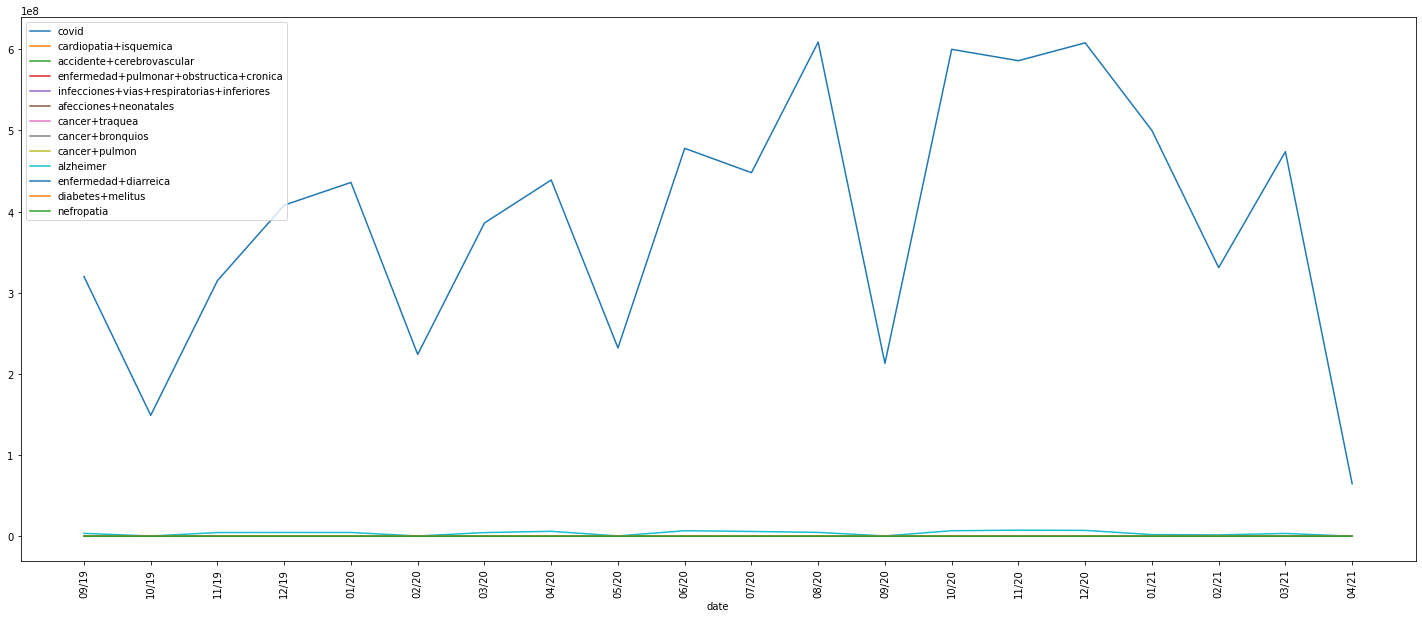

In [12]:
data.plot(rot=90, figsize=(25,10))
plt.xticks(np.arange(20), date);